In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [3]:
model=Sequential()

In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv('Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data=data.drop(columns=['Unnamed: 0'],axis=1)
x=data.iloc[:,data.columns!='medv'].values

In [6]:
y=data['medv'].values

In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(x,y)

In [8]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [9]:
train_targets

array([23.7,  7. , 31.6, 36.1, 19.3, 50. , 23.7, 22.6, 22. , 22. , 41.3,
       33.2, 21.2, 11.3, 22.8, 21.7, 19.3, 15. , 21.8, 29.1, 22.5, 21.7,
       24.5, 20.8, 23.1, 17.1, 19.9, 15.4, 38.7, 14.5, 16.2, 33. , 19.9,
       15.2, 22.4, 10.4, 18.6, 21.5, 22.2, 19.6, 23.2,  5. , 13.9, 20.1,
       23.6, 20.5, 28.4, 17.5, 23.2, 18.5, 22.9, 50. , 44.8, 16.5, 43.8,
       16.6, 22.9, 31.1, 32.9, 36.2, 18.2, 45.4, 26.2, 37.2,  8.1, 29.6,
       25. , 33.4, 24.3, 10.2, 23.4, 28.7, 37.3,  8.4, 22.3, 18. , 50. ,
       26.4, 21.2, 43.5, 19.1, 22.8, 21.6, 20.1, 33.3, 20.1, 19.5, 23.1,
       21.2, 50. , 12. , 18.9, 18.5, 20.9, 37.9, 23.1, 10.5, 10.4, 22.2,
       30.3, 10.2, 32. , 24.6, 11.9, 11.7, 13.4, 14.8, 22.2, 13.4, 23.3,
       19.6, 24. , 21.7, 18.2, 41.7, 23. , 48.5,  8.3, 15.6, 13.3, 20.3,
        7.2, 15.3, 18.7, 50. ,  9.5, 50. , 13.6, 19.1, 13.1, 22.6, 24.8,
       24. , 21.2, 21.1, 17.8,  8.5, 16.1, 26.6, 18.9, 19.9, 22.7, 50. ,
       33.4, 17.8, 22.5, 28.7, 35.4,  9.6, 17.5, 35

In [10]:
train_data

array([[5.70818e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.93070e+02, 7.74000e+00],
       [1.83370e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
        3.44050e+02, 2.39700e+01],
       [1.43200e-02, 1.00000e+02, 1.32000e+00, ..., 1.51000e+01,
        3.92900e+02, 3.95000e+00],
       ...,
       [6.58800e-02, 0.00000e+00, 2.46000e+00, ..., 1.78000e+01,
        3.95560e+02, 7.56000e+00],
       [1.67600e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 7.20000e+00],
       [2.11240e-01, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
        3.86630e+02, 2.99300e+01]])

In [11]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [12]:
#after normalizing
#now as we have small dataset we use a very small network ,In general
#the less training data we have teh worse overfiting will be ,so we have to use small
#neural network

In [13]:
def build_model():
    model.add(Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [14]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
scores=[]

In [16]:
for i in range(k):
    print('fold',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
    scores.append(val_mae)

fold 0
fold 1
fold 2
fold 3


In [17]:
scores

[2.715782880783081, 2.067401647567749, 1.9492411613464355, 1.8344366550445557]

In [18]:
np.mean(scores)

2.1417155861854553

In [21]:
num_epochs=500
all_mae_hist=[]
for i in range(k):
    print('fold',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,verbose=0)
    mae_hist=history.history['val_mean_absolute_error']
    all_mae_hist.append(mae_hist)

fold 0


KeyError: 'val_mean_absolute_error'

In [26]:
model=build_model()
history=model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.5706 - mae: 2.6398


In [27]:
print(test_mae_score)

2.6398186683654785


In [28]:
#Loss function MSE is used for regression
#metrics to use is MAE
#when there is little data available use K FOLD VALIDATION 
#WHEN little training data is available it's preferrable to use a small networkd with few hidden layers


In [29]:
history_dict=history.history

In [30]:
history_dict.keys()

dict_keys(['loss', 'mae'])

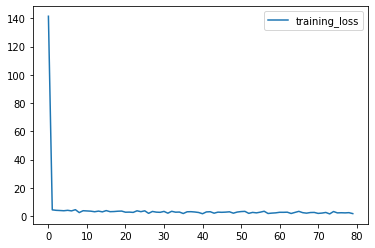

In [39]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
epochs=[i for i in range(80)]
plt.plot(epochs,loss_values,label='training_loss')
plt.legend()
plt.show()

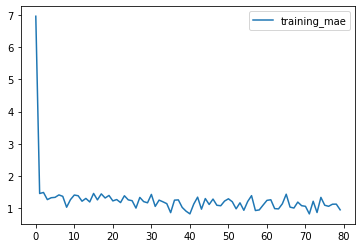

In [40]:
mae_values=history_dict['mae']
epochs=[i for i in range(80)]
plt.plot(epochs,mae_values,label='training_mae')
plt.legend()
plt.show()

In [38]:
epochs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119]

In [42]:
#REUTER'S DATASET------